# AAPL、GOOG、MSFT、AMZN、FB股票市场分析

**目的：**
- 分析每个公司的股价走势
- 比较亚马逊和谷歌以及微软和脸书的股价走势
- 通过分位数来对苹果的股价进行风险评估
- 彩蛋：分析唯品会的股价趋势

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
# 利用此包获取数据
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# 取股价数据的开始时间
start = datetime(2015, 1, 1)
company = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']
# 从yahoo获取数据(需要科学上网)
top_tech_df = pdr.get_data_yahoo(company, start=start)['Adj Close']

In [6]:
# 将数据写到本地data文件夹中
# top_tech_df.to_csv('../data/compy_top5.csv')

In [10]:
# 从本地读取航班数据
# top_tech_df = pd.read_csv("../data/compy_top5.csv")

In [15]:
top_tech_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2014-12-31,101.419060,524.958740,41.700874,310.350006,78.019997
2015-01-02,100.454300,523.373108,41.979183,308.519989,78.449997
2015-01-05,97.624336,512.463013,41.593143,302.190002,77.190002
2015-01-06,97.633545,500.585632,40.982681,295.290009,76.150002
2015-01-07,99.002556,499.727997,41.503380,298.420013,76.150002


In [16]:
# 获取当日数据的股价差（当日最高点的股价减去当日最低点的股价）
top_tech_dr = top_tech_df.pct_change()

In [17]:
top_tech_dr

Symbols,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009513,-0.003020,0.006674,-0.005897,0.005511
2015-01-05,-0.028172,-0.020846,-0.009196,-0.020517,-0.016061
2015-01-06,0.000094,-0.023177,-0.014677,-0.022833,-0.013473
2015-01-07,0.014022,-0.001713,0.012705,0.010600,0.000000
...,...,...,...,...,...
2019-12-20,-0.002071,-0.004757,0.010918,-0.003225,0.001165
2019-12-23,0.016318,-0.000556,0.000000,0.003638,-0.000582
2019-12-24,0.000951,-0.003914,-0.000191,-0.002114,-0.005141


### 1.分析每个公司的股价走势

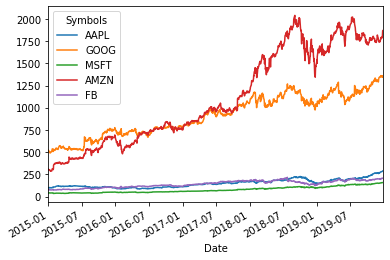

In [18]:
# 画出每个公司的价格走势图
top_tech_df.plot()
plt.show()

**由上图可以清晰的看出15年到19年这几个公司的股价都呈上升趋势，但AMZN、GOOG的股价上升的更为明显，这其中可能也与其公司规模有关。**

### 2.比较AAPl、FB、MSFT三家公司的股价

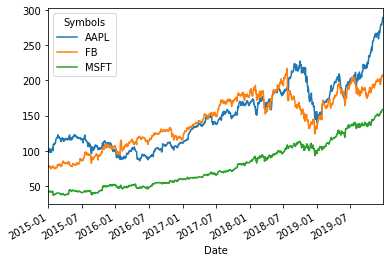

In [19]:
top_tech_df[['AAPL', 'FB', 'MSFT']].plot()
plt.show()

**由上图可以看出，当将这三家规模差不多的公司放在一起进行比较时，可以发现AAPL和FB股价走势非常接近，可以推测这两家公司是否存在相互影响的关系。而MSFT股价的走势非常平稳，呈稳步上升趋势。**

### 3.使用散点图比较亚马逊和谷歌的股价走势

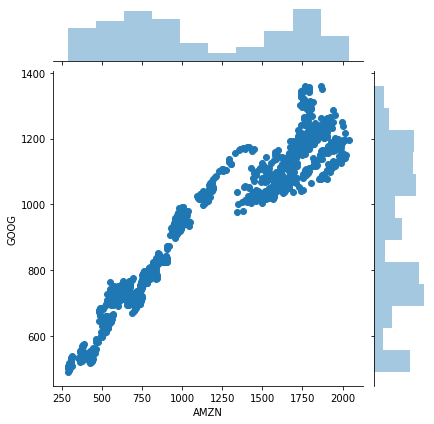

In [20]:
sns.jointplot('AMZN', 'GOOG', top_tech_df, kind='scatter')
plt.show()

**由上图可以看出AMZN和GOOG之间的相关性还是挺强的，基本呈一条直线，说明他们之间还是存在相互影响的关系的。**

### 4.使用散点图比较微软和脸书的股价走势

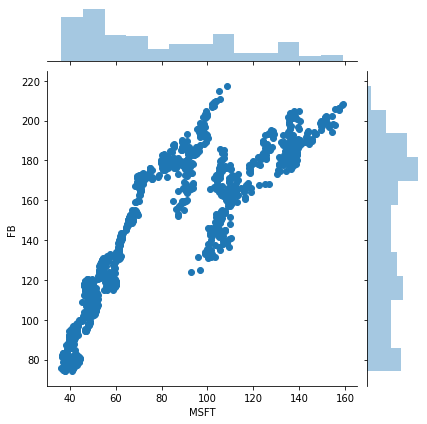

In [21]:
sns.jointplot('MSFT', 'FB', top_tech_df, kind='scatter')
plt.show()

**由上图可以看出，这两家公司的散点图比较分散，可以初步判断这两家公司在业务上可能并没有很强的关联性。**

### 5.多图比较

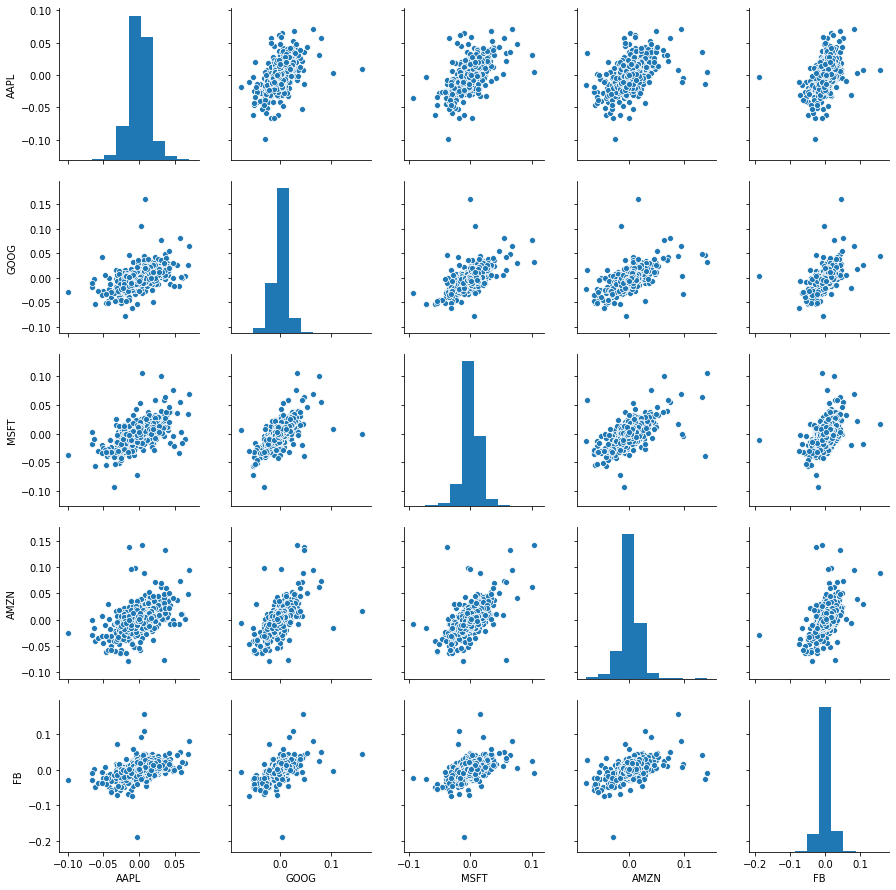

In [22]:
sns.pairplot(top_tech_dr.dropna())
plt.show()

**从中可以详细的比较出各个公司之间的关联关系。（此处的分析我就省略了，大家自由发挥。）**

### 6.通过分位数来评估AAPL风险

In [23]:
top_tech_dr['AAPL'].quantile(0.25)

-0.005864575038559611

**含义是：我们有75%的信心确保最大亏损是-0.005**

### 7.评估MSFT的风险

In [24]:
top_tech_dr['MSFT'].quantile(0.05)

-0.021079002470549363

**含义是：我们有95%的信心确保MSFT的股价最大亏损是-0.02**

### 8.分析唯品会的股票趋势

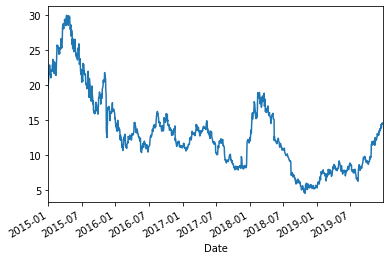

In [27]:
vips = pdr.get_data_yahoo('VIPS', start=start)['Adj Close']
vips.plot()
plt.show()

**由上图可以看出，唯品会的股价在15年4、5月份时达到了一个峰值，随后便开始下跌，期间也有过涨幅，但整体还是低于之前的峰值，近几年又逐渐开始回升，很可能是找到了适合自己的运营方式。**

### 9.计算出每天有多大的信心保证每日的亏损保持在-0.02%

In [29]:
vips.pct_change().quantile(0.2)

-0.02276922372671275

**由此我们可以看出，我们只有80%的信心保证每日的亏损在-0.02%之间**